# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join("data", "labeled_dataset.csv")
df = pd.read_csv(csv_path)

In [2]:
unique_classes = df['class'].unique()
print(f"The Number of Unique Classes: {len(unique_classes)}")
print(f"\n{unique_classes}")

The Number of Unique Classes: 23

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [3]:
df['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [4]:
unique_protocol = df['protocol_type'].unique()
print(f"The Number of Unique Classes: {len(unique_protocol)}")
print(f"\n{unique_protocol}")

The Number of Unique Classes: 3

['tcp' 'udp' 'icmp']


## Do attacks tend to use TCP with large payloads?

In [5]:
df[(df['protocol_type'] == 'tcp') & (df['src_bytes'] > 500)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
42,2,tcp,smtp,SF,1591,372,0,0,0,0,...,0.81,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
60,0,tcp,ftp_data,SF,641,0,0,0,0,0,...,0.25,0.02,0.25,0.04,0.00,0.00,0.00,0.00,normal,21
65,0,tcp,smtp,SF,696,333,0,0,0,0,...,0.39,0.04,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
95,2,tcp,smtp,SF,3065,331,0,0,0,0,...,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
111,0,tcp,smtp,SF,2089,335,0,0,0,0,...,0.60,0.03,0.00,0.00,0.01,0.02,0.00,0.01,normal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125944,1,tcp,smtp,SF,2049,362,0,0,0,0,...,0.92,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125952,0,tcp,smtp,SF,1289,408,0,0,0,0,...,0.23,0.06,0.00,0.00,0.51,0.00,0.02,0.00,normal,15
125957,1,tcp,smtp,SF,1247,327,0,0,0,0,...,0.53,0.03,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal,19


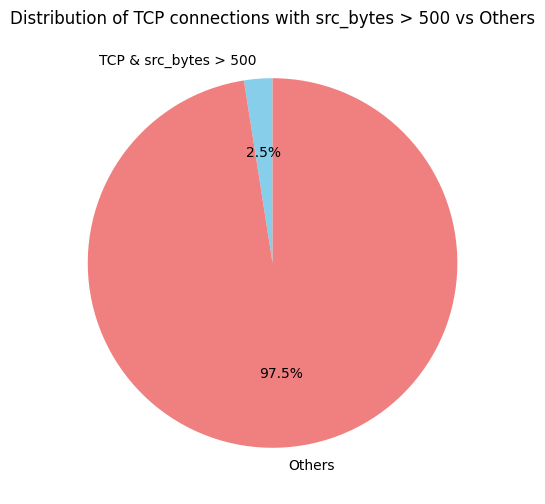

In [6]:
condition = (df['protocol_type'] == 'tcp') & (df['src_bytes'] > 5000)
counts = [condition.sum(), (~condition).sum()]
labels = ['TCP & src_bytes > 500', 'Others']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightcoral'])
plt.title("Distribution of TCP connections with src_bytes > 500 vs Others")
plt.show()

In [7]:
print(df['protocol_type'].value_counts())

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


In [8]:
tcp_traffic = df[df['protocol_type'] == 'tcp']
print(f"Traffic of the TCP Count is: {len(tcp_traffic)}")
tcp_traffic = df[df['protocol_type'] == 'udp']
print(f"Traffic of the UDP Count is: {len(tcp_traffic)}")
tcp_traffic = df[df['protocol_type'] == 'icmp']
print(f"Traffic of the ICMP Count is: {len(tcp_traffic)}")

Traffic of the TCP Count is: 102689
Traffic of the UDP Count is: 14993
Traffic of the ICMP Count is: 8291


In [9]:
df['land'].unique()

array([0, 1])

In [10]:
land_attack = (df['land']==1)
print(f"Land attacks Found are: {len(df[land_attack])}")
print(f"Land attacks Not Found are: {len(df[~land_attack])}")

Land attacks Found are: 25
Land attacks Not Found are: 125948


In [11]:
first_ten_rows = df.iloc[10:30]
first_ten_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
10,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
11,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.00,neptune,21
12,0,tcp,http,SF,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.0,0.00,0.00,normal,21
13,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.20,0.00,0.0,0.00,0.00,warezclient,15
14,0,tcp,name,S0,0,0,0,0,0,0,...,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.00,neptune,19
15,0,tcp,netbios_ns,S0,0,0,0,0,0,0,...,0.01,0.06,0.00,0.00,1.00,1.0,0.00,0.00,neptune,18
16,0,tcp,http,SF,300,13788,0,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.0,0.00,0.00,normal,21
17,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.00,ipsweep,18
18,0,tcp,http,SF,233,616,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.02,0.00,normal,21
19,0,tcp,http,SF,343,1178,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.0,0.00,0.00,normal,21


In [12]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [13]:
print(df['class'].value_counts())

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [14]:
print("\nAverage Duration by the Protocols")
print(df.groupby('protocol_type')['duration'].mean())


Average Duration by the Protocols
protocol_type
icmp      0.000000
tcp     281.386419
udp     485.372040
Name: duration, dtype: float64


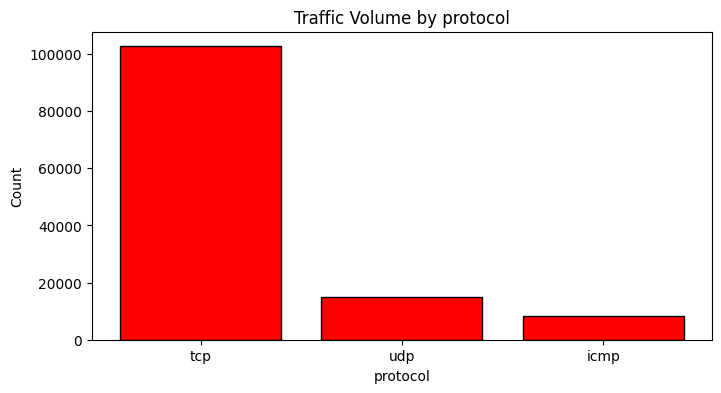

In [15]:
protocol_counts = df['protocol_type'].value_counts()
protocol_counts

def set_plot(title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plt.figure(figsize=(8,4))
plt.bar(protocol_counts.index,protocol_counts.values,color = "red",edgecolor = "black")
set_plot("Traffic Volume by protocol","protocol","Count")
plt.show()

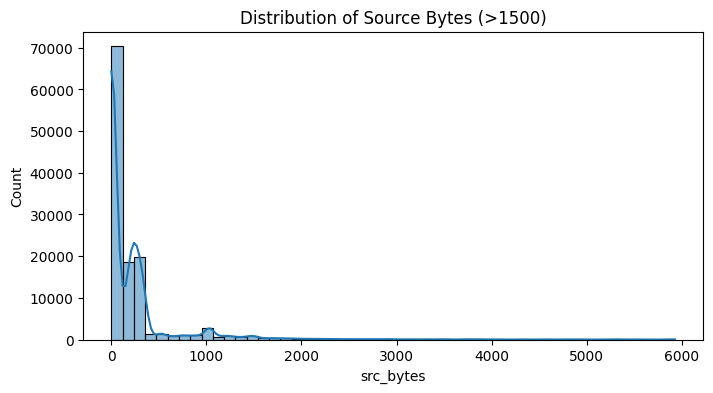

In [16]:
small_bytes = df[df['src_bytes']<6000]
small_bytes

plt.figure(figsize = (8,4))
sns.histplot(small_bytes['src_bytes'],bins = 50, kde=True)
plt.title("Distribution of Source Bytes (>1500)")
plt.show()

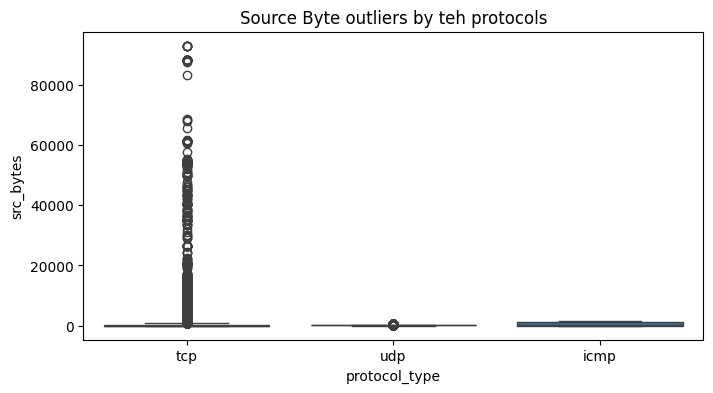

In [17]:
plt.figure(figsize = (8,4))
small_bytes = df[df['src_bytes']<100000]

sns.boxplot(x = 'protocol_type',y = 'src_bytes',data = small_bytes)
plt.title("Source Byte outliers by teh protocols")
plt.show()

In [18]:
ct = pd.crosstab(df['protocol_type'],df['flag'])
ct

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
protocol_type,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,8291,0
tcp,46,11233,1562,103,2421,34851,365,127,49,51661,271
udp,0,0,0,0,0,0,0,0,0,14993,0


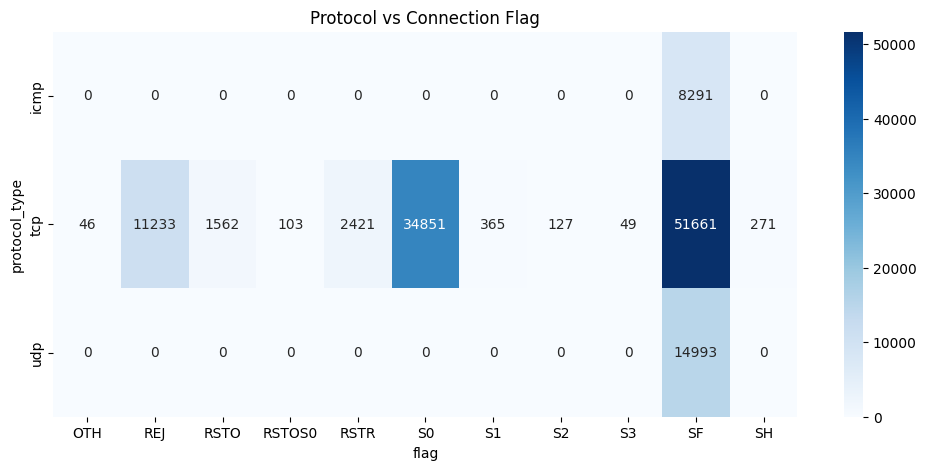

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(ct,annot = True, fmt='d', cmap='Blues')
plt.title("Protocol vs Connection Flag")
plt.show()

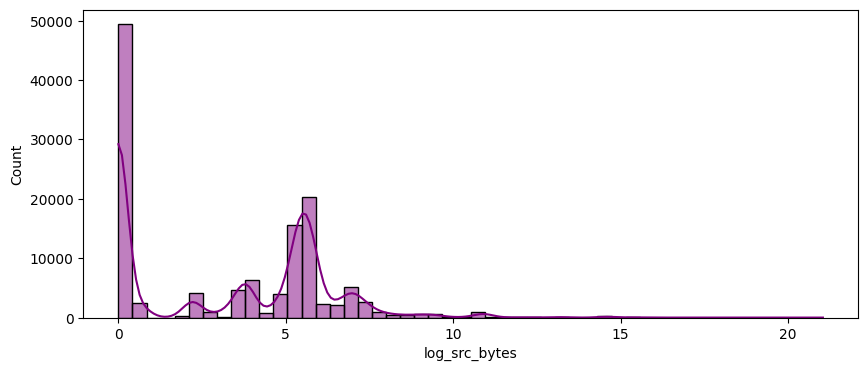

In [20]:
df['log_src_bytes'] = np.log1p(df['src_bytes'])
df['log_src_bytes']
plt.figure(figsize = (10,4))
sns.histplot(df['log_src_bytes'],bins=50,kde=True,color="purple")
plt.show()

In [21]:
numerical_cols = ['duration','src_bytes','dst_bytes','count','srv_count']
corr = df[numerical_cols].corr()

print("\nCorelation Matrix:\n", corr)


Corelation Matrix:
            duration  src_bytes  dst_bytes     count  srv_count
duration   1.000000   0.070737   0.034878 -0.079042  -0.039470
src_bytes  0.070737   1.000000   0.000204 -0.005152  -0.002792
dst_bytes  0.034878   0.000204   1.000000 -0.003543  -0.001754
count     -0.079042  -0.005152  -0.003543  1.000000   0.471079
srv_count -0.039470  -0.002792  -0.001754  0.471079   1.000000



Correlation Matrix:
            duration  src_bytes  dst_bytes     count  srv_count
duration   1.000000   0.070737   0.034878 -0.079042  -0.039470
src_bytes  0.070737   1.000000   0.000204 -0.005152  -0.002792
dst_bytes  0.034878   0.000204   1.000000 -0.003543  -0.001754
count     -0.079042  -0.005152  -0.003543  1.000000   0.471079
srv_count -0.039470  -0.002792  -0.001754  0.471079   1.000000


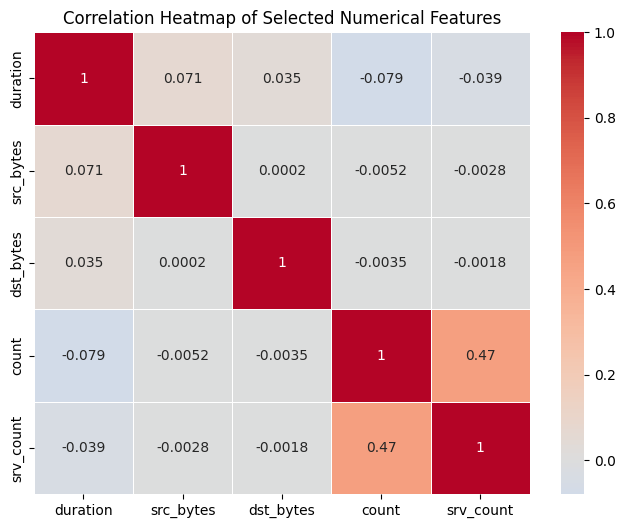

In [22]:
numerical_cols = ['duration','src_bytes','dst_bytes','count','srv_count']
corr = df[numerical_cols].corr()

print("\nCorrelation Matrix:\n", corr)

# Visual representation with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Numerical Features")
plt.show()


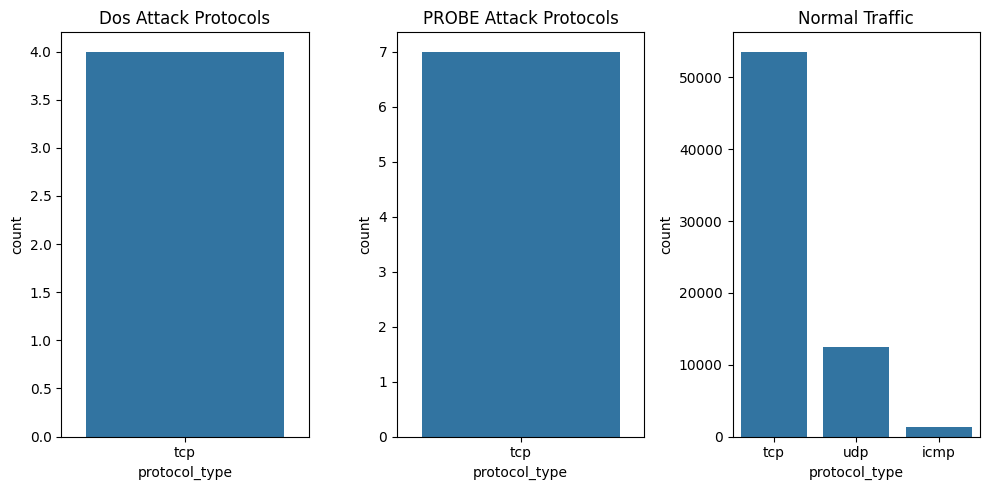

In [23]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.countplot(x='protocol_type', data = df[df['class'] == 'phf'],ax= axes[0])
axes[0].set_title("Dos Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'multihop'],ax= axes[1])
axes[1].set_title("PROBE Attack Protocols")
sns.countplot(x='protocol_type', data = df[df['class'] == 'normal'],ax= axes[2])
axes[2].set_title("Normal Traffic")

plt.tight_layout()
plt.show()


Average Duration per Class:
 class
land                  0.000000
nmap                  0.000000
pod                   0.000000
smurf                 0.000000
teardrop              0.000000
neptune               0.000049
satan                 0.127718
back                  0.297071
guess_passwd          2.716981
ipsweep               3.616004
phf                   4.500000
imap                  6.545455
warezmaster          15.050000
ftp_write            32.375000
loadmodule           36.222222
perl                 41.333333
buffer_overflow      91.700000
rootkit             100.800000
normal              168.587396
multihop            184.000000
spy                 318.000000
warezclient         705.092135
portsweep          8246.697032
Name: duration, dtype: float64


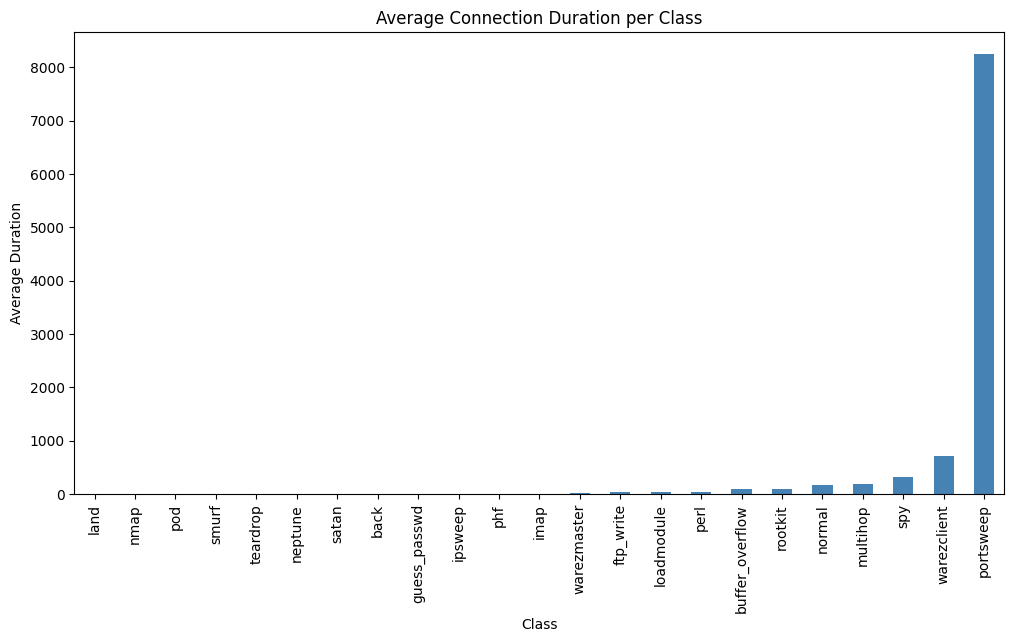

In [25]:
avg_duration = df.groupby('class')['duration'].mean().sort_values()

print("\nAverage Duration per Class:\n", avg_duration)

# Plot as bar chart
plt.figure(figsize=(12,6))
avg_duration.plot(kind='bar', color='steelblue')
plt.title("Average Connection Duration per Class")
plt.ylabel("Average Duration")
plt.xlabel("Class")
plt.show()


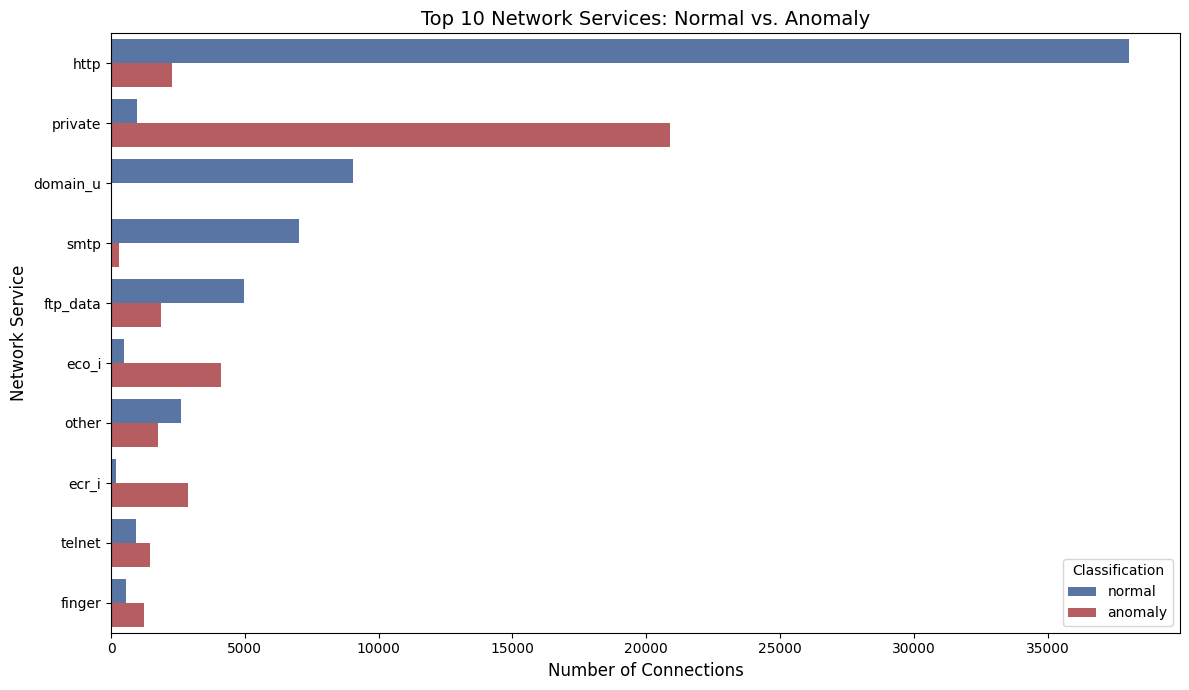

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['binary_target'] = df['class'].apply(lambda x: 'normal' if x == 'normal' else 'anomaly')

# Get the top 10 most frequent services
top_10_services = df['service'].value_counts().head(10).index

# Filter the dataframe to only include these top 10 services
df_top_services = df[df['service'].isin(top_10_services)]

# Display the graph
plt.figure(figsize=(12, 7))
sns.countplot(y='service', hue='binary_target', data=df_top_services, 
              order=top_10_services, palette=['#4C72B0', '#C44E52'])

plt.title('Top 10 Network Services: Normal vs. Anomaly', fontsize=14)
plt.xlabel('Number of Connections', fontsize=12)
plt.ylabel('Network Service', fontsize=12)
plt.legend(title='Classification')
plt.tight_layout()
plt.show()

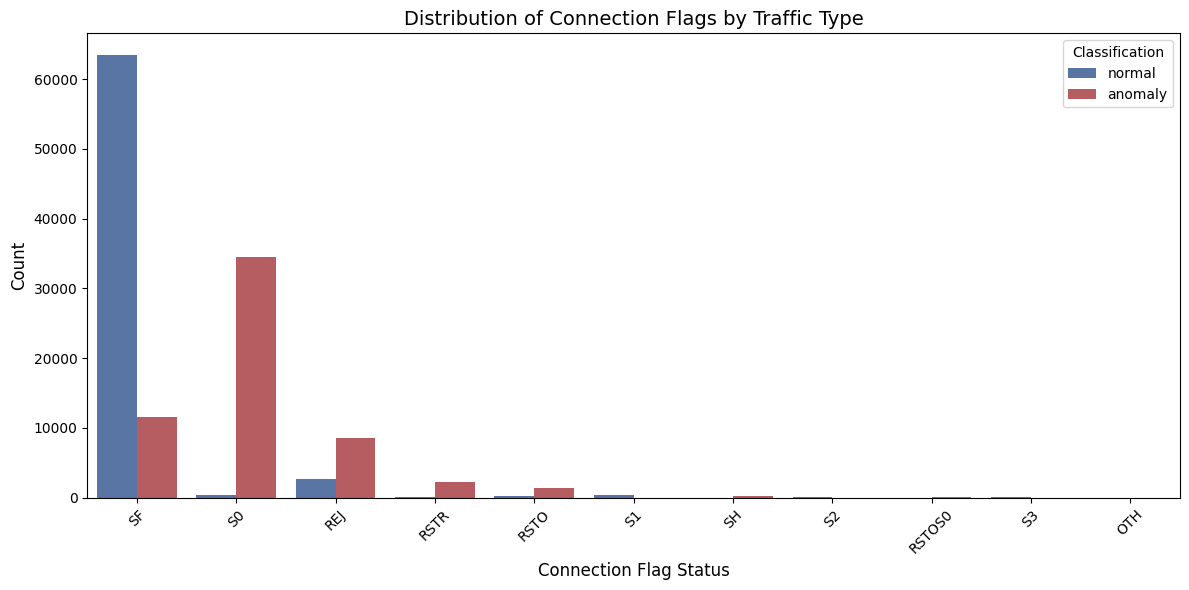

In [28]:
plt.figure(figsize=(12, 6))
# Order by the most frequent flags
flag_order = df['flag'].value_counts().index

sns.countplot(x='flag', hue='binary_target', data=df, 
              order=flag_order, palette=['#4C72B0', '#C44E52'])
plt.title('Distribution of Connection Flags by Traffic Type', fontsize=14)
plt.xlabel('Connection Flag Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classification', loc='upper right')
plt.tight_layout()
plt.show()

In [30]:
# Select only numerical features
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate absolute correlation matrix
corr_matrix = numeric_cols.corr().abs()

# Unstack the matrix to get pairs
upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
highly_correlated = []

for i, j in zip(*upper_triangle_indices):
    highly_correlated.append({'Feature 1': corr_matrix.columns[i],'Feature 2': corr_matrix.columns[j],'Correlation': corr_matrix.iloc[i, j]})

corr_df = pd.DataFrame(highly_correlated)
corr_df = corr_df.sort_values(by='Correlation', ascending=False).dropna()

print("Top 15 Most Highly Correlated Feature Pairs:")
print(corr_df.head(15).to_string(index=False))

Top 15 Most Highly Correlated Feature Pairs:
           Feature 1                Feature 2  Correlation
     num_compromised                 num_root     0.998833
         serror_rate          srv_serror_rate     0.993289
         rerror_rate          srv_rerror_rate     0.989008
     srv_serror_rate dst_host_srv_serror_rate     0.986252
dst_host_serror_rate dst_host_srv_serror_rate     0.985052
         serror_rate dst_host_srv_serror_rate     0.981139
         serror_rate     dst_host_serror_rate     0.979373
     srv_serror_rate     dst_host_serror_rate     0.977596
     srv_rerror_rate dst_host_srv_rerror_rate     0.970208
         rerror_rate dst_host_srv_rerror_rate     0.964449
         rerror_rate     dst_host_rerror_rate     0.926749
dst_host_rerror_rate dst_host_srv_rerror_rate     0.924688
     srv_rerror_rate     dst_host_rerror_rate     0.917822
  dst_host_srv_count   dst_host_same_srv_rate     0.896663
                 hot           is_guest_login     0.860288


In [31]:
numeric_cols = df.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr().abs()

upper_triangle_indices = np.triu_indices_from(corr_matrix, k=1)
highly_correlated = []

for i, j in zip(*upper_triangle_indices):
    highly_correlated.append({
        'Feature 1': corr_matrix.columns[i],
        'Feature 2': corr_matrix.columns[j],
        'Correlation': corr_matrix.iloc[i, j]
    })

corr_df = pd.DataFrame(highly_correlated)
corr_df = corr_df.sort_values(by='Correlation', ascending=False).dropna()

print("Top 15 Most Highly Correlated Feature Pairs:")
print("-" * 50)
print(corr_df.head(15).to_string(index=False))

Top 15 Most Highly Correlated Feature Pairs:
--------------------------------------------------
           Feature 1                Feature 2  Correlation
     num_compromised                 num_root     0.998833
         serror_rate          srv_serror_rate     0.993289
         rerror_rate          srv_rerror_rate     0.989008
     srv_serror_rate dst_host_srv_serror_rate     0.986252
dst_host_serror_rate dst_host_srv_serror_rate     0.985052
         serror_rate dst_host_srv_serror_rate     0.981139
         serror_rate     dst_host_serror_rate     0.979373
     srv_serror_rate     dst_host_serror_rate     0.977596
     srv_rerror_rate dst_host_srv_rerror_rate     0.970208
         rerror_rate dst_host_srv_rerror_rate     0.964449
         rerror_rate     dst_host_rerror_rate     0.926749
dst_host_rerror_rate dst_host_srv_rerror_rate     0.924688
     srv_rerror_rate     dst_host_rerror_rate     0.917822
  dst_host_srv_count   dst_host_same_srv_rate     0.896663
                 ho

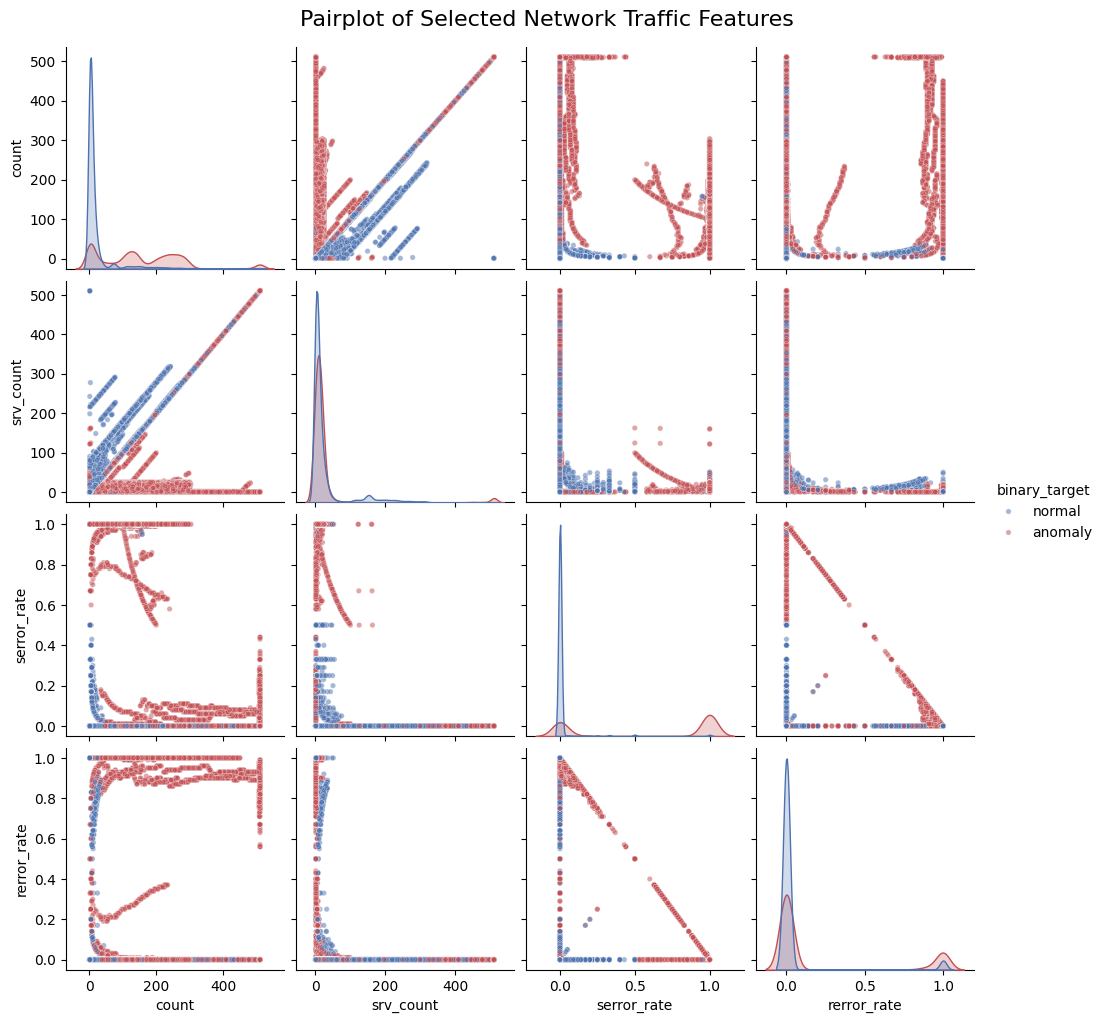

In [34]:
features_to_plot = ['count', 'srv_count', 'serror_rate', 'rerror_rate', 'binary_target']
subset_df = df[features_to_plot]

sns.pairplot(subset_df, hue='binary_target', palette=['#4C72B0', '#C44E52'], plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle('Pairplot of Selected Network Traffic Features', y=1.02, fontsize=16)
plt.show()

In [37]:
df['protocol_type']

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object

In [38]:
df['protocol_type']

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object